#Dataset Download

In [12]:
# Import libraries
import os
import cv2
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
from pathlib import Path

#Download Dataset

In [ ]:
# Install kaggle
!pip install -q kaggle

In [ ]:
# Download dataset menggunakan kaggle API key
!kaggle datasets download -d 'loki4514/rice-leaf-diseases-detection'

Dataset URL: https://www.kaggle.com/datasets/loki4514/rice-leaf-diseases-detection
License(s): apache-2.0
100% 8.03G/8.03G [01:45<00:00, 54.3MB/s]
100% 8.03G/8.03G [01:45<00:00, 81.6MB/s]


#Extract Dataset

In [ ]:
# Import library untuk handling zip file
import zipfile

In [ ]:
# Spesifikan  nama file
dataset_zip = zipfile.ZipFile('rice-leaf-diseases-detection.zip','r')

# Extract the related zip file
dataset_zip.extractall('rice-leaf-diseases-detection')

# Tutup zip file
dataset_zip.close()

In [13]:
#parent path
current_dir = Path.cwd()
parent_path = Path.joinpath(current_dir, 'rice-leaf-diseases-detection/Rice_Leaf_Diease/Rice_Leaf_Diease')
train_path = Path.joinpath(parent_path, 'train')
test_path = Path.joinpath(parent_path, 'test')

#Sample Inspection

In [14]:
from PIL import Image

# Fungsi untuk memuat dan mengubah ukuran gambar menggunakan PIL
def load_and_resize_image(file_path, target_shape=(128, 128)):
    image = Image.open(file_path).convert('RGB')  # Membuka gambar dan mengonversi ke RGB
    resized_image = image.resize(target_shape)   # Mengubah ukuran gambar
    return np.array(resized_image)               # Mengembalikan gambar dalam bentuk array

In [20]:
# Fungsi untuk memuat gambar dari direktori
def load_image_class_by_directory(image_dir):
    # Daftar file gambar di dalam direktori
    image_files = [file for file in os.listdir(image_dir) if file.lower().endswith('.jpg') or file.lower().endswith('.png')]
    images = [load_and_resize_image(os.path.join(image_dir, file)) for file in image_files]

    print(f"Class: {image_dir.name}")
    print(f"Num of images: {len(images)}")
    print(f"Single image shape before flattening: {images[0].shape}")
    return images

In [19]:
# Menampilkan beberapa gambar
def display_images(images, num_images_to_display, label):
    fig, axes = plt.subplots(1, num_images_to_display, figsize=(20, 5))
    if num_images_to_display == 1:
        axes.imshow(images[0])
        axes.axis('off')
    else:
        for i in range(num_images_to_display):
            axes[i].imshow(images[i])
            axes[i].axis('off')
    plt.show()

In [17]:
def replace_underscore_from_path(child_path):
    for path in parent_path.rglob('*'):
      if path.is_dir():
        new_name = path.name.replace('_', ' ').lower()
        new_path = Path.joinpath(path.parent, new_name)
        Path.rename(path, new_path)
replace_underscore_from_path(train_path)
replace_underscore_from_path(test_path)

##Dataset Classes:
1. Bacterial Leaf Blight
2. Brown Spot
3. Healthy
4. Leaf Blast
5. Leaf Scald
6. Narrow Brown Spot
7. Neck Blast
8. Rice Hispa
9. Sheath Blight
10. Tungro

Class: leaf blast
Num of images: 1801
Single image shape before flattening: (128, 128, 3)


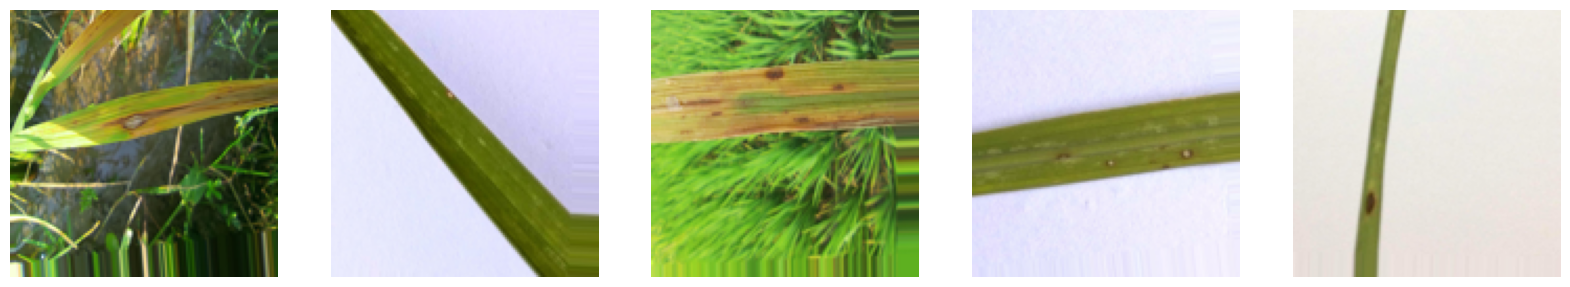

Class: leaf scald
Num of images: 1670
Single image shape before flattening: (128, 128, 3)


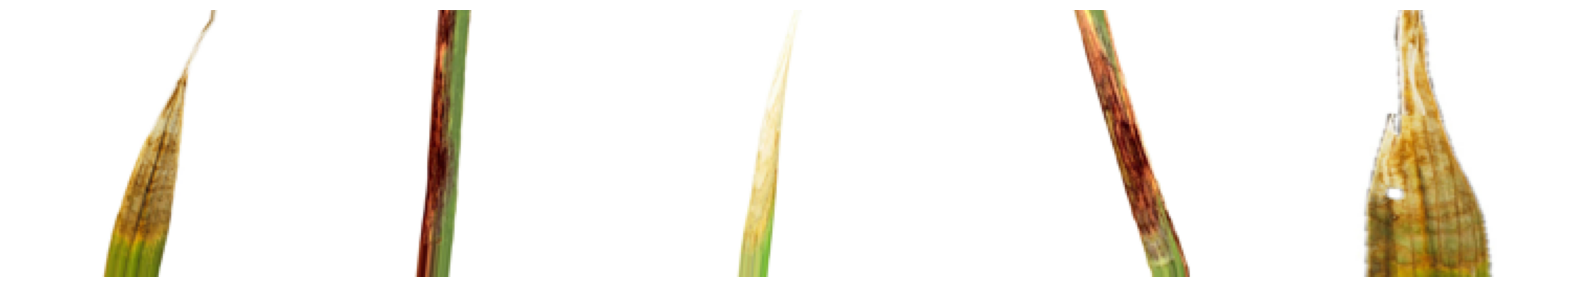

Class: tungro
Num of images: 1740
Single image shape before flattening: (128, 128, 3)


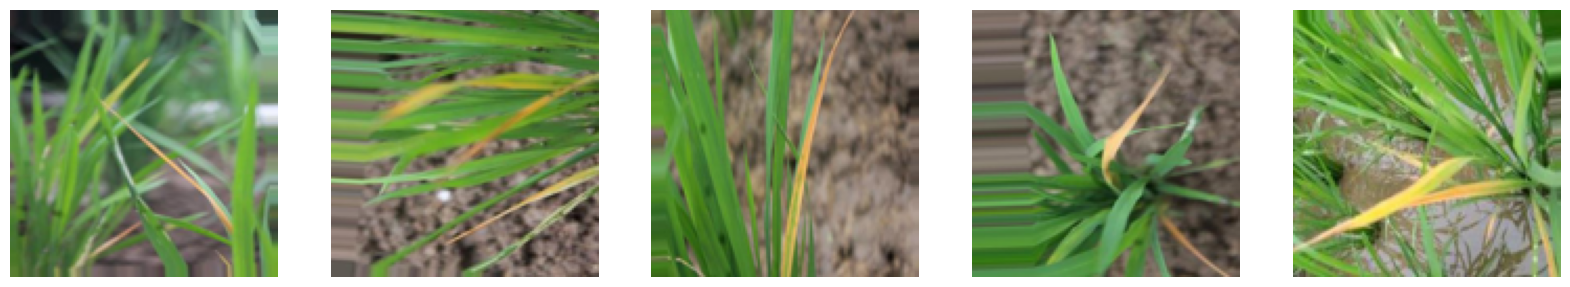

Class: brown spot
Num of images: 1480
Single image shape before flattening: (128, 128, 3)


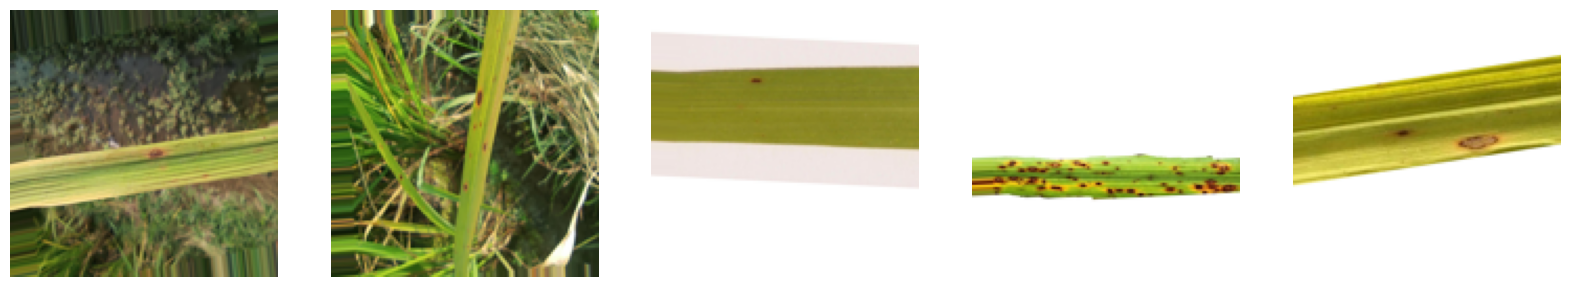

Class: rice hispa
Num of images: 1461
Single image shape before flattening: (128, 128, 3)


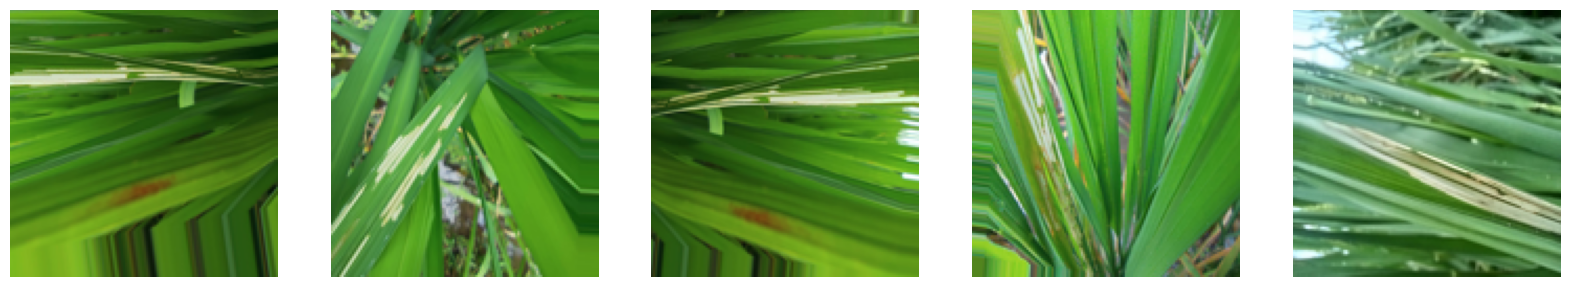

Class: bacterial leaf blight
Num of images: 1386
Single image shape before flattening: (128, 128, 3)


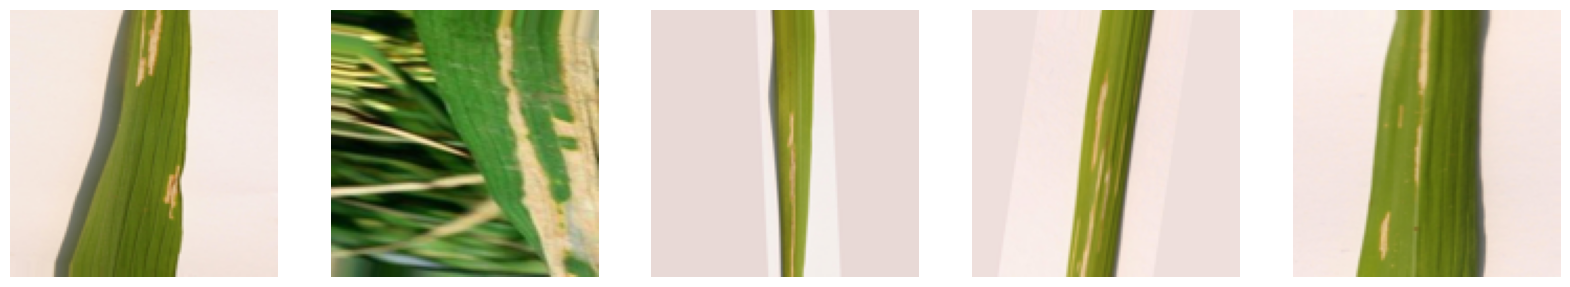

Class: neck blast
Num of images: 1000
Single image shape before flattening: (128, 128, 3)


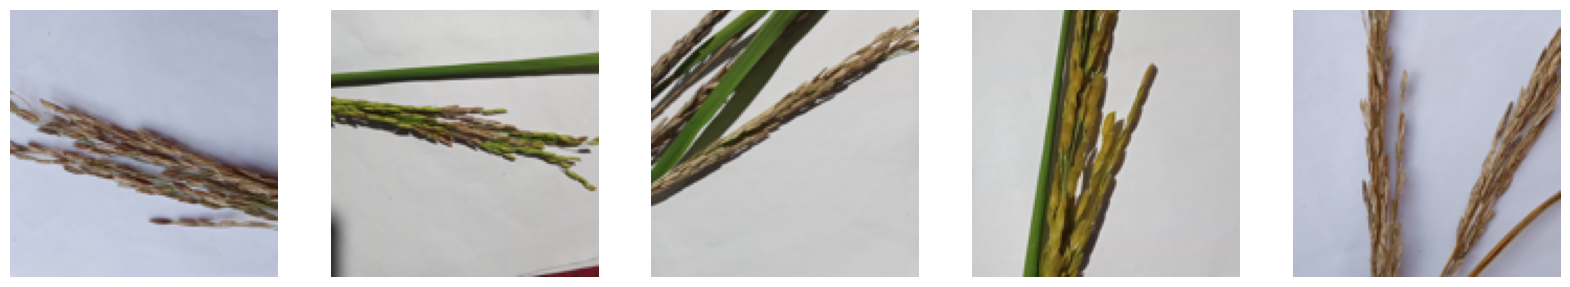

Class: sheath blight
Num of images: 1578
Single image shape before flattening: (128, 128, 3)


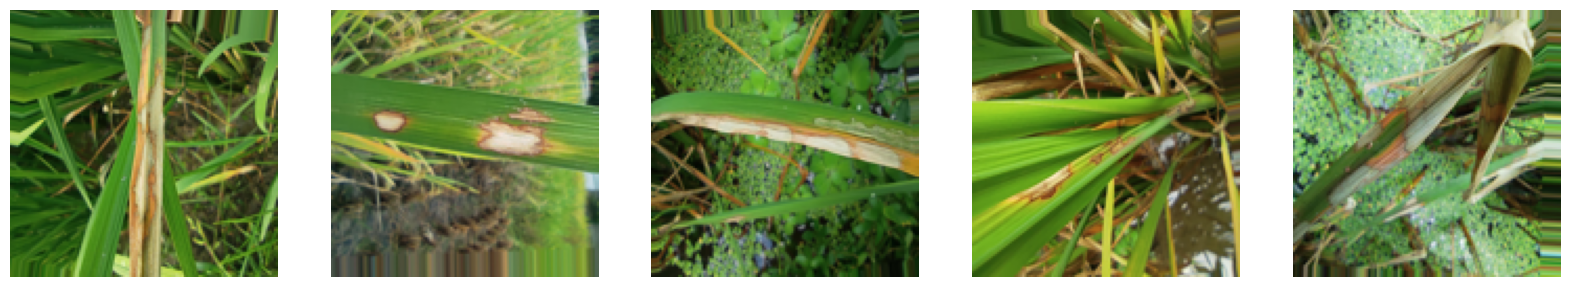

Class: narrow brown spot
Num of images: 1416
Single image shape before flattening: (128, 128, 3)


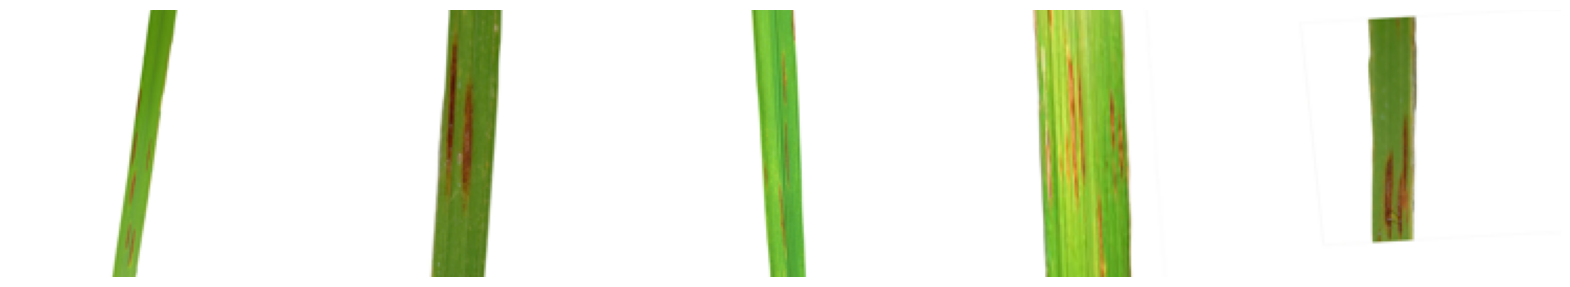

Class: healthy
Num of images: 1491
Single image shape before flattening: (128, 128, 3)


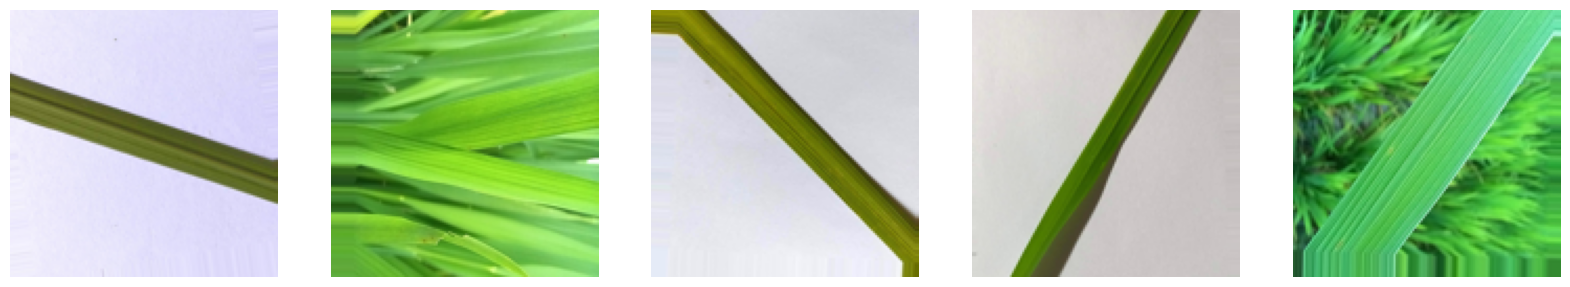

In [47]:
for path in train_path.iterdir():
  if path.is_dir():
    # Path menuju direktori kelas gambar
    image_dir = Path.joinpath(train_path, path.name)

    # Memuat gambar dari direktori
    images = load_image_class_by_directory(image_dir)

    # Menampilkan beberapa gambar
    display_images(images, num_images_to_display=5, label=path.name)

In [21]:
def count_images_in_classes(base_dir):
    # Daftar semua subfolder dalam base_dir
    class_dirs = [d for d in os.listdir(base_dir) if os.path.isdir(os.path.join(base_dir, d))]

    # Iterasi untuk menghitung jumlah gambar setiap kelas
    for class_name in class_dirs:
        class_path = os.path.join(base_dir, class_name)
        # Hitung file dengan ekstensi .jpg atau .JPG
        num_images = len([f for f in os.listdir(class_path) if f.lower().endswith('.jpg')])
        print(f"Disease: {class_name} --- Images: {num_images}")

# Run fungsi
print("TRAIN DATASET")
count_images_in_classes(train_path)
print("TEST DATASET")
count_images_in_classes(test_path)

TRAIN DATASET
Disease: leaf blast --- Images: 1801
Disease: leaf scald --- Images: 1670
Disease: tungro --- Images: 1740
Disease: brown spot --- Images: 1480
Disease: rice hispa --- Images: 1461
Disease: bacterial leaf blight --- Images: 1386
Disease: neck blast --- Images: 1000
Disease: sheath blight --- Images: 1578
Disease: narrow brown spot --- Images: 1416
Disease: healthy --- Images: 1491
TEST DATASET
Disease: leaf blast --- Images: 362
Disease: leaf scald --- Images: 386
Disease: tungro --- Images: 310
Disease: brown spot --- Images: 380
Disease: rice hispa --- Images: 225
Disease: bacterial leaf blight --- Images: 373
Disease: neck blast --- Images: 322
Disease: sheath blight --- Images: 288
Disease: narrow brown spot --- Images: 382
Disease: healthy --- Images: 391


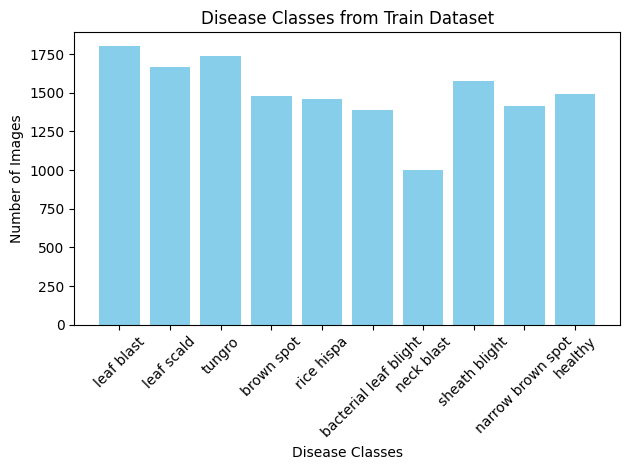

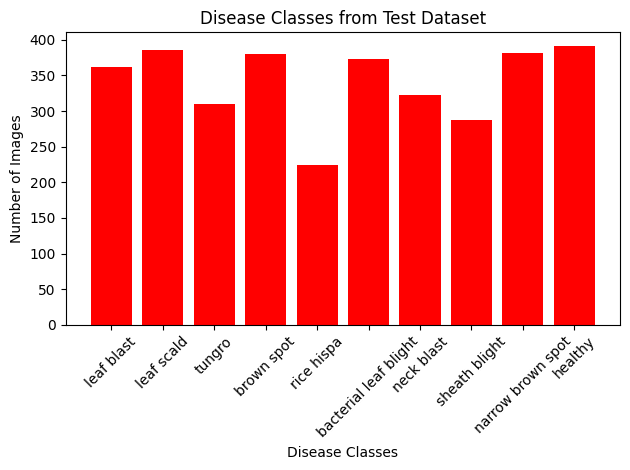

In [28]:
def count_images_and_plot(base_dir, title, color):
    # Hitung jumlah gambar per kelas
    class_dirs = [d for d in os.listdir(base_dir) if os.path.isdir(os.path.join(base_dir, d))]
    class_counts = [len([f for f in os.listdir(os.path.join(base_dir, d)) if f.lower().endswith('.jpg')]) for d in class_dirs]

    # Buat chart
    plt.bar(class_dirs, class_counts, color=color)
    plt.xlabel('Disease Classes')
    plt.ylabel('Number of Images')
    plt.title(title)
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()


# Hitung dan juga tampilkan chart
count_images_and_plot(train_path, "Disease Classes from Train Dataset", "skyblue")
count_images_and_plot(test_path, "Disease Classes from Test Dataset", "red")


In [29]:
batch_size = 32
img_size = (150, 150)
train_ds = tf.keras.utils.image_dataset_from_directory(
    train_path,
    validation_split=0.2,
    subset="training",
    seed=123,
    image_size=img_size,
    batch_size=batch_size
)

val_test_ds = tf.keras.utils.image_dataset_from_directory(
    test_path,
    validation_split=0.2,
    subset='validation',
    seed=123,
    image_size=img_size,
    batch_size=batch_size
)
class_names = train_ds.class_names
# Further split the validation dataset to create a test dataset
val_batches = int(0.5 * val_test_ds.cardinality().numpy())
valid_ds = val_test_ds.take(val_batches)
test_ds = val_test_ds.skip(val_batches)

# Print dataset information
print(f"Training batches: {train_ds.cardinality().numpy()}")
print(f"Validation batches: {valid_ds.cardinality().numpy()}")
print(f"Testing batches: {test_ds.cardinality().numpy()}")

Found 15023 files belonging to 10 classes.
Using 12019 files for training.
Found 3422 files belonging to 10 classes.
Using 684 files for validation.
Training batches: 376
Validation batches: 11
Testing batches: 11


In [ ]:
# # Normalization layer
# normalization_layer = tf.keras.layers.Rescaling(1./255)

# # Data augmentation layers
# data_augmentation = tf.keras.Sequential([
#     tf.keras.layers.RandomFlip("horizontal_and_vertical"),         # Random horizontal & vertical flip
#     tf.keras.layers.RandomRotation(0.2),                           # Random rotation by up to 20%
#     tf.keras.layers.RandomBrightness(factor=0.2),                  # Random brightness adjustment
#     tf.keras.layers.RandomContrast(factor=0.2),                    # Random contrast adjustment
#     tf.keras.layers.RandomZoom(height_factor=0.2, width_factor=0.2) # Random zoom
# ])

# # Apply the transformations to the train dataset
# train_ds = train_ds.map(lambda x, y: (data_augmentation(normalization_layer(x)), y))

# # Apply normalization only to validation and test datasets
# valid_ds = valid_ds.map(lambda x, y: (normalization_layer(x), y))
# test_ds = test_ds.map(lambda x, y: (normalization_layer(x), y))

# # Shuffle the training dataset
# train_ds = train_ds.shuffle(buffer_size=4746)  # Buffer size for shuffling (adjust as needed)

# # Prefetch data for performance improvement
# AUTOTUNE = tf.data.AUTOTUNE
# train_dataset = train_ds.prefetch(buffer_size=AUTOTUNE)
# valid_dataset = valid_ds.prefetch(buffer_size=AUTOTUNE)


In [30]:
def data_augmentation(image, label):
    # Normalize the image to [0, 1]
    image = tf.cast(image, tf.float32) / 255.0  # Rescale the image to [0, 1]

    # Apply random flips
    image = tf.image.random_flip_left_right(image)  # Random horizontal flip
    image = tf.image.random_flip_up_down(image)    # Random vertical flip

    # # Random rotation: Rotate by a random angle between -30 and 30 degrees
    # angles = np.random.uniform(-30, 30)  # Random angle in degrees
    # radians = angles * np.pi / 180  # Convert degrees to radians

    # # Rotate image using tf.image, which only rotates by 90 degrees.
    # # So, we need to rotate by arbitrary angles using tf.image.resize.

    # image = tf.image.resize(image, (200, 200))  # Resize to a larger size
    # image = tf.image.central_crop(image, central_fraction=0.75)  # Crop back to original size

    # # Optionally, resize back to original target size (if needed)
    # image = tf.image.resize(image, (128, 128))  # Resize to the original target size

    return image, label

train_ds = train_ds.map(data_augmentation)

# Shuffle the training dataset
train_ds = train_ds.shuffle(buffer_size=15023)  # Buffer size for shuffling (adjust as needed)

# Apply only normalization to the validation dataset (no augmentation)
def normalize_image(image, label):
    image = tf.cast(image, tf.float32) / 255.0  # Normalize the image
    return image, label

valid_ds = valid_ds.map(normalize_image)
test_ds = test_ds.map(normalize_image)

# Prefetch data for performance improvement
AUTOTUNE = tf.data.AUTOTUNE
train_dataset = train_ds.prefetch(buffer_size=AUTOTUNE)
valid_dataset = valid_ds.prefetch(buffer_size=AUTOTUNE)



In [32]:
model = tf.keras.Sequential([
  tf.keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=(150, 150, 3), padding='same'),
  tf.keras.layers.MaxPool2D(2, 2),
  tf.keras.layers.Conv2D(64, (3, 3), activation='relu', padding='same'),
  tf.keras.layers.MaxPool2D(2, 2),
  tf.keras.layers.Conv2D(128, (3, 3), activation='relu', padding='same'),
  tf.keras.layers.MaxPool2D(2, 2),
  tf.keras.layers.Flatten(),
  tf.keras.layers.Dense(128, activation='relu'),
  tf.keras.layers.Dense(10, activation='softmax'),
])

model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_3 (Conv2D)                    │ (None, 150, 150, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_3 (MaxPooling2D)       │ (None, 75, 75, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_4 (Conv2D)                    │ (None, 75, 75, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_4 (MaxPooling2D)       │ (None, 37, 37, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_5 (Conv2D)                    │ (None, 37, 37, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_5 (MaxPooling2D)       │ (None, 18, 18, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_1 (Flatten)                  │ (None, 41472)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 128)                 │       5,308,544 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 10)                  │           1,290 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 5,403,082 (20.61 MB)

 Trainable params: 5,403,082 (20.61 MB)

 Non-trainable params: 0 (0.00 B)

In [33]:
model.compile(loss='sparse_categorical_crossentropy',
                 optimizer=tf.keras.optimizers.Adam(),
                 metrics=['accuracy'])

history = model.fit(train_dataset,
                    epochs=10,
                    validation_data=valid_dataset)


Epoch 1/10
376/376 ━━━━━━━━━━━━━━━━━━━━ 136s 60ms/step - accuracy: 0.4415 - loss: 1.5881 - val_accuracy: 0.7415 - val_loss: 0.7882
Epoch 2/10
376/376 ━━━━━━━━━━━━━━━━━━━━ 120s 38ms/step - accuracy: 0.7451 - loss: 0.7109 - val_accuracy: 0.8097 - val_loss: 0.5055
Epoch 3/10
376/376 ━━━━━━━━━━━━━━━━━━━━ 141s 35ms/step - accuracy: 0.8033 - loss: 0.5459 - val_accuracy: 0.8580 - val_loss: 0.3948
Epoch 4/10
376/376 ━━━━━━━━━━━━━━━━━━━━ 143s 39ms/step - accuracy: 0.8528 - loss: 0.4156 - val_accuracy: 0.9176 - val_loss: 0.2666
Epoch 5/10
376/376 ━━━━━━━━━━━━━━━━━━━━ 118s 36ms/step - accuracy: 0.8718 - loss: 0.3485 - val_accuracy: 0.9062 - val_loss: 0.2855
Epoch 6/10
376/376 ━━━━━━━━━━━━━━━━━━━━ 152s 38ms/step - accuracy: 0.8893 - loss: 0.3125 - val_accuracy: 0.9233 - val_loss: 0.1976
Epoch 7/10
376/376 ━━━━━━━━━━━━━━━━━━━━ 126s 39ms/step - accuracy: 0.8980 - loss: 0.2791 - val_accuracy: 0.9375 - val_loss: 0.1704
Epoch 8/10
376/376 ━━━━━━━━━━━━━━━━━━━━ 141s 39ms/step - accuracy: 0.9209 - loss: 0

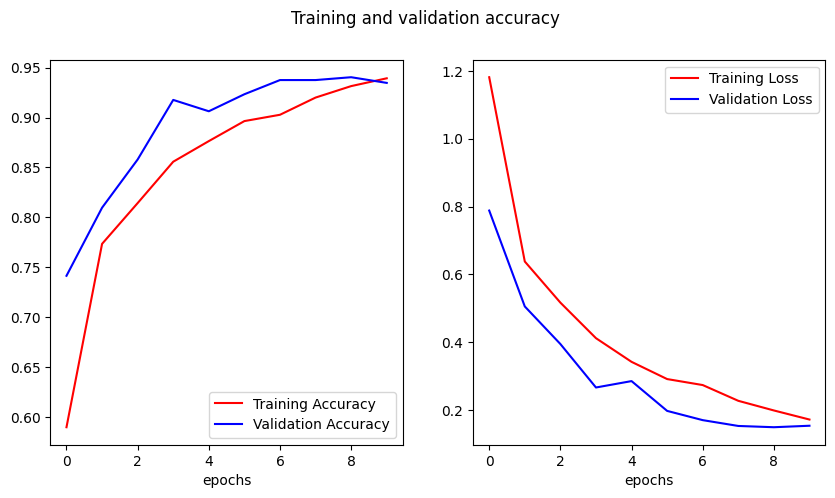

In [34]:
# Get training and validation accuracies
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

# Get number of epochs
epochs = range(len(acc))

fig, ax = plt.subplots(1, 2, figsize=(10, 5))
fig.suptitle('Training and validation accuracy')

for i, (data, label) in enumerate(zip([(acc, val_acc), (loss, val_loss)], ["Accuracy", "Loss"])):
    ax[i].plot(epochs, data[0], 'r', label="Training " + label)
    ax[i].plot(epochs, data[1], 'b', label="Validation " + label)
    ax[i].legend()
    ax[i].set_xlabel('epochs')

plt.show()

In [35]:
test_loss, test_acc = model.evaluate(test_ds)
print(f"Test Loss: {test_loss}")
print(f"Test Accuracy: {test_acc}")

11/11 ━━━━━━━━━━━━━━━━━━━━ 10s 603ms/step - accuracy: 0.9435 - loss: 0.1587
Test Loss: 0.1780467927455902
Test Accuracy: 0.9337349534034729


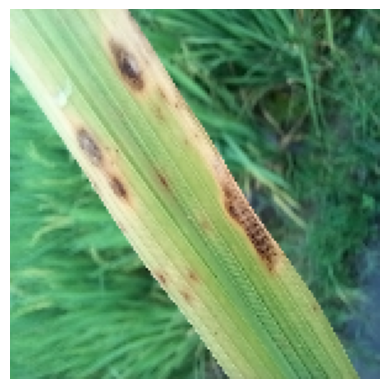

Label: leaf blast
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
Predicted Class: sheath blight
Confidence: 49.80%
Prediction: [[5.3142710e-05 4.4861189e-03 7.1976028e-05 4.7324607e-01 5.7952777e-03
  2.2348103e-03 4.8214893e-05 3.0363110e-04 4.9802649e-01 1.5734144e-02]]


In [38]:
#test model using test_ds
def get_image_by_index(dataset, index):
  for i, (image, label) in enumerate(dataset):
    if i == index:
      return image[0], label[0]
  return None, None

index = 1 #index is representative for total batch (max 26)
image, label = get_image_by_index(test_ds, index)

if image is not None:
  plt.imshow(tf.keras.preprocessing.image.array_to_img(image))
  plt.axis('off')
  plt.show()
  print(f"Label: {class_names[label]}")
  prediction = model.predict(np.expand_dims(image, axis=0))
  predicted_class = class_names[np.argmax(prediction)]
  confidence = np.max(prediction[0]) * 100

  print(f"Predicted Class: {predicted_class}")
  print(f"Confidence: {confidence:.2f}%")
  print(f"Prediction: {prediction}")
else:
  print("Image not found in the dataset.")


##run this cell below if you want to predict image from the internet or IRL pic, dont forget to upload your images first and change the path into your images name.

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step


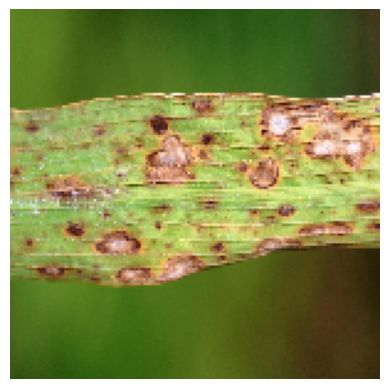

Predicted Class: leaf blast
Confidence: 99.63%


In [42]:
#test image from image on the internet
image_path = '/content/1.jpg' #change to your own image
image = tf.keras.preprocessing.image.load_img(image_path, target_size=(150, 150))
image = tf.keras.preprocessing.image.img_to_array(image)
image = np.expand_dims(image, axis=0)
image = image / 255.0

prediction = model.predict(image)
predicted_class = class_names[np.argmax(prediction)]
confidence = np.max(prediction[0]) * 100

plt.imshow(image[0])
plt.axis('off')
plt.show()
print(f"Predicted Class: {predicted_class}")
print(f"Confidence: {confidence:.2f}%")

#save model

In [46]:
# Load model architecture
model_json = model.to_json()
with open("rice_disease_detector_model.json", "w") as json_file:
    json_file.write(model_json)

# Load weights
model.save_weights("rice_disease_detector_weights.weights.h5")